# Explore here

# Paso 1
# Planteamiento del problema y recolección de la data

* Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019
* El objetivo principal de este analisis estara enfocado en establecer en que vecindarios se presentan los mayores valores de los inmuebles.

In [2]:
# Your code here
import pandas as pd
import os 

# Importar archivo csv
df_abny=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df_abny


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
# Informacion del df
print(df_abny.columns)

df_abny.describe()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Paso 2
# Exploracion y limpieza de datos

In [4]:
df_abny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
print(df_abny.shape)
# Conocer los valores nulos
nulos=df_abny.isnull().sum()
print(nulos)
# Conocer los valores duplicados
df_abny.duplicated().sum()

(48895, 16)
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


np.int64(0)

El DataSet consta de 48895 registros, 16 columnas con la siguiente distribucion y dtypes: 
* 3 tipo float64 
* 7 tipo int64 y 
* 6 tipo object. 

Entre las columnas se encuentra la clase a predecir: price. 

Se encontraron 20141 datos nulos ubicados en cuatro columnas:
* name: 16
* host_name: 21
* last_review: 10052
* reviews_per_month: 10052

No se encontraron registros duplicados

In [6]:
# Eliminamos valores con precio igual a 0
df_abny.drop(df_abny[df_abny['price'] == 0].index, inplace=True)

# Eliminar columnas innecesarias
df_abny.drop(['id','name','host_name','last_review','reviews_per_month'],axis=1,inplace=True)
df_abny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48884 non-null  int64  
 1   neighbourhood_group             48884 non-null  object 
 2   neighbourhood                   48884 non-null  object 
 3   latitude                        48884 non-null  float64
 4   longitude                       48884 non-null  float64
 5   room_type                       48884 non-null  object 
 6   price                           48884 non-null  int64  
 7   minimum_nights                  48884 non-null  int64  
 8   number_of_reviews               48884 non-null  int64  
 9   calculated_host_listings_count  48884 non-null  int64  
 10  availability_365                48884 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.5+ MB


# Paso 3
# Análisis de variables Univariable

In [7]:
# Conteo tipo de propiedad
df_abny['room_type'].value_counts()


room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

In [8]:
# Conteo propiedades por grupo de vecindarios
df_abny['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

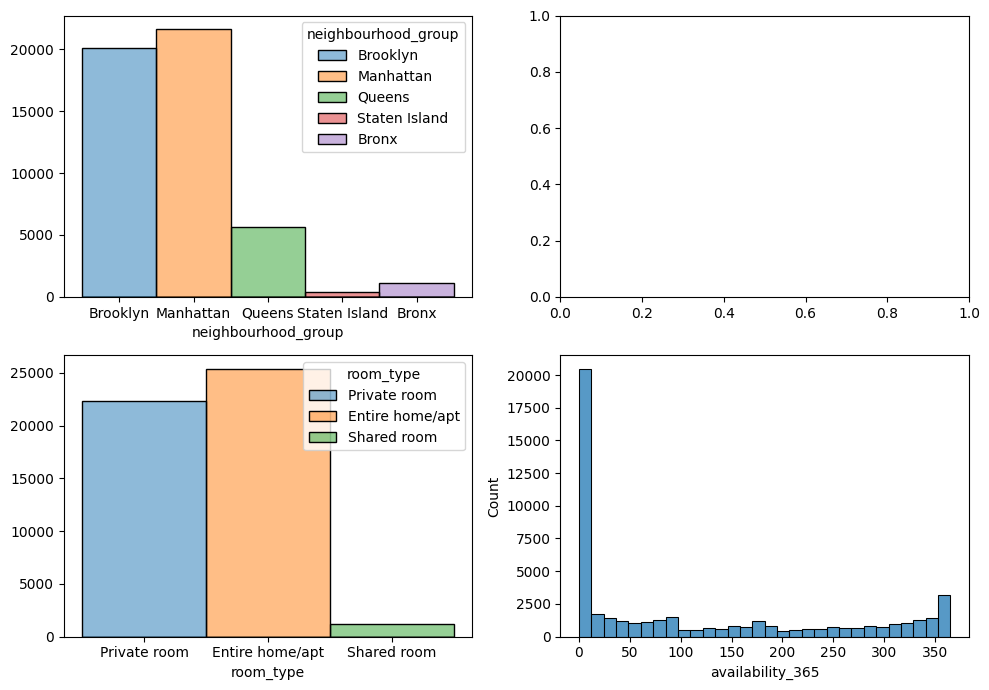

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Histogramas 
sns.histplot(ax = axis[0, 0], data = df_abny, x = "neighbourhood_group", hue='neighbourhood_group').set(ylabel = None)

sns.histplot(ax = axis[1, 0], data = df_abny, x = "room_type", hue='room_type').set(ylabel = None)

sns.histplot(ax = axis[1,1], data = df_abny, x = "availability_365")

plt.tight_layout()
plt.show()

3.1. Univariante Categoricas

* eighbourhood_group: 
    - Manhattan tiene la mayor cantidad de propiedades con 21661 (44,3%), segundo Brooklyn con 20104 (41,1%), Queens, Bronx y Staten Island completan los datos  aproximadamente el 15%.
* neighbourhood: 
    - Williamsburg es el vecindario con mas propiedades con 3920, segundo Bedford-Stuyvesant con 3714, Harlem con 2658, Bushwick con 2465 y Upper West Side 1971
* room_type: 
    - El tipo de propiedad Entire home/apt es el mas alquilado con 25409, seguido por Private room con 22326 y Shared room con 1160.

In [10]:
# Variable precio
df_abny['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
df_abny['availability_365'].describe()

count    48884.000000
mean       112.779498
std        131.627271
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

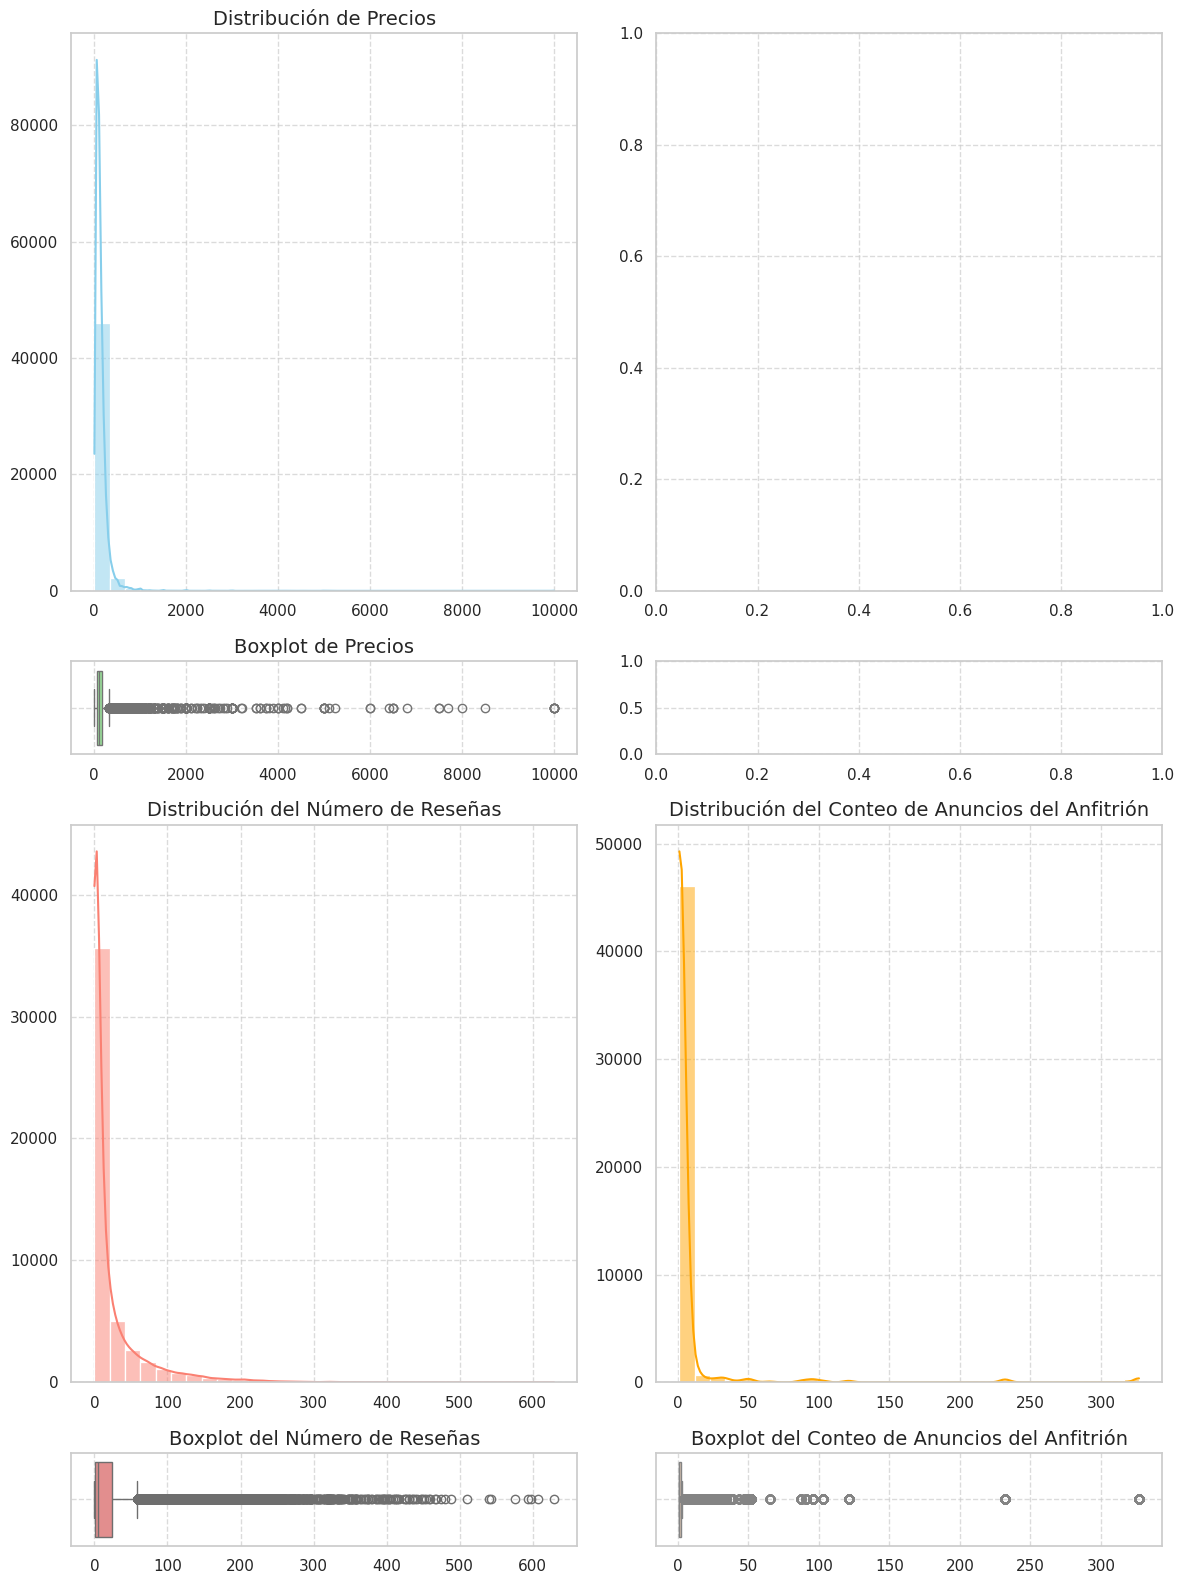

In [12]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear los subplots
fig, axis = plt.subplots(4, 2, figsize=(12, 16), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Histograma y Boxplot para 'price'
sns.histplot(ax=axis[0, 0], data=df_abny, x="price", bins=30, kde=True, color="skyblue")
sns.boxplot(ax=axis[1, 0], data=df_abny, x="price", color="lightgreen")
axis[0, 0].set_title('Distribución de Precios', fontsize=14)
axis[1, 0].set_title('Boxplot de Precios', fontsize=14)

# Histograma y Boxplot para 'number_of_reviews'
sns.histplot(ax=axis[2, 0], data=df_abny, x="number_of_reviews", bins=30, kde=True, color="salmon")
sns.boxplot(ax=axis[3, 0], data=df_abny, x="number_of_reviews", color="lightcoral")
axis[2, 0].set_title('Distribución del Número de Reseñas', fontsize=14)
axis[3, 0].set_title('Boxplot del Número de Reseñas', fontsize=14)

# Histograma y Boxplot para 'calculated_host_listings_count'
sns.histplot(ax=axis[2, 1], data=df_abny, x="calculated_host_listings_count", bins=30, kde=True, color="orange")
sns.boxplot(ax=axis[3, 1], data=df_abny, x="calculated_host_listings_count", color="peachpuff")
axis[2, 1].set_title('Distribución del Conteo de Anuncios del Anfitrión', fontsize=14)
axis[3, 1].set_title('Boxplot del Conteo de Anuncios del Anfitrión', fontsize=14)

# Ajustar etiquetas de los ejes
for ax in axis.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

3.2. Univariante Numerica

* price: 
    - La variable precio tiene un sesgo positivo, se tiene un valor maximo de 10000. La media es 152.7 y con mediana de 106, evidenciandose un sesgo o asimetria positiva. Existen 11 registros con precio cero (0) que seran eliminados de la data, estos registros no afectan los valores de la media y mediana. El 83% de los datos se encuentran entre 10 y 200 dolares, 12% de los precios entre 200 y 350, finalmente, el 5% superior a 350.
* calculated_host_listings_count:
    - El 66% de los valores son menores o iguales a 1, el 27,8% son valores mayores a 1 y menores o iguales a 10, el 4,5% estan ubicados sobre 10 y menores o iguales a 100, por encima de 100 se encuentra el 1,7%. Esta variable tiene un media de 7,14, una moda de y un valor maximo de 327.

# Paso 4
# Analisis Multivariable

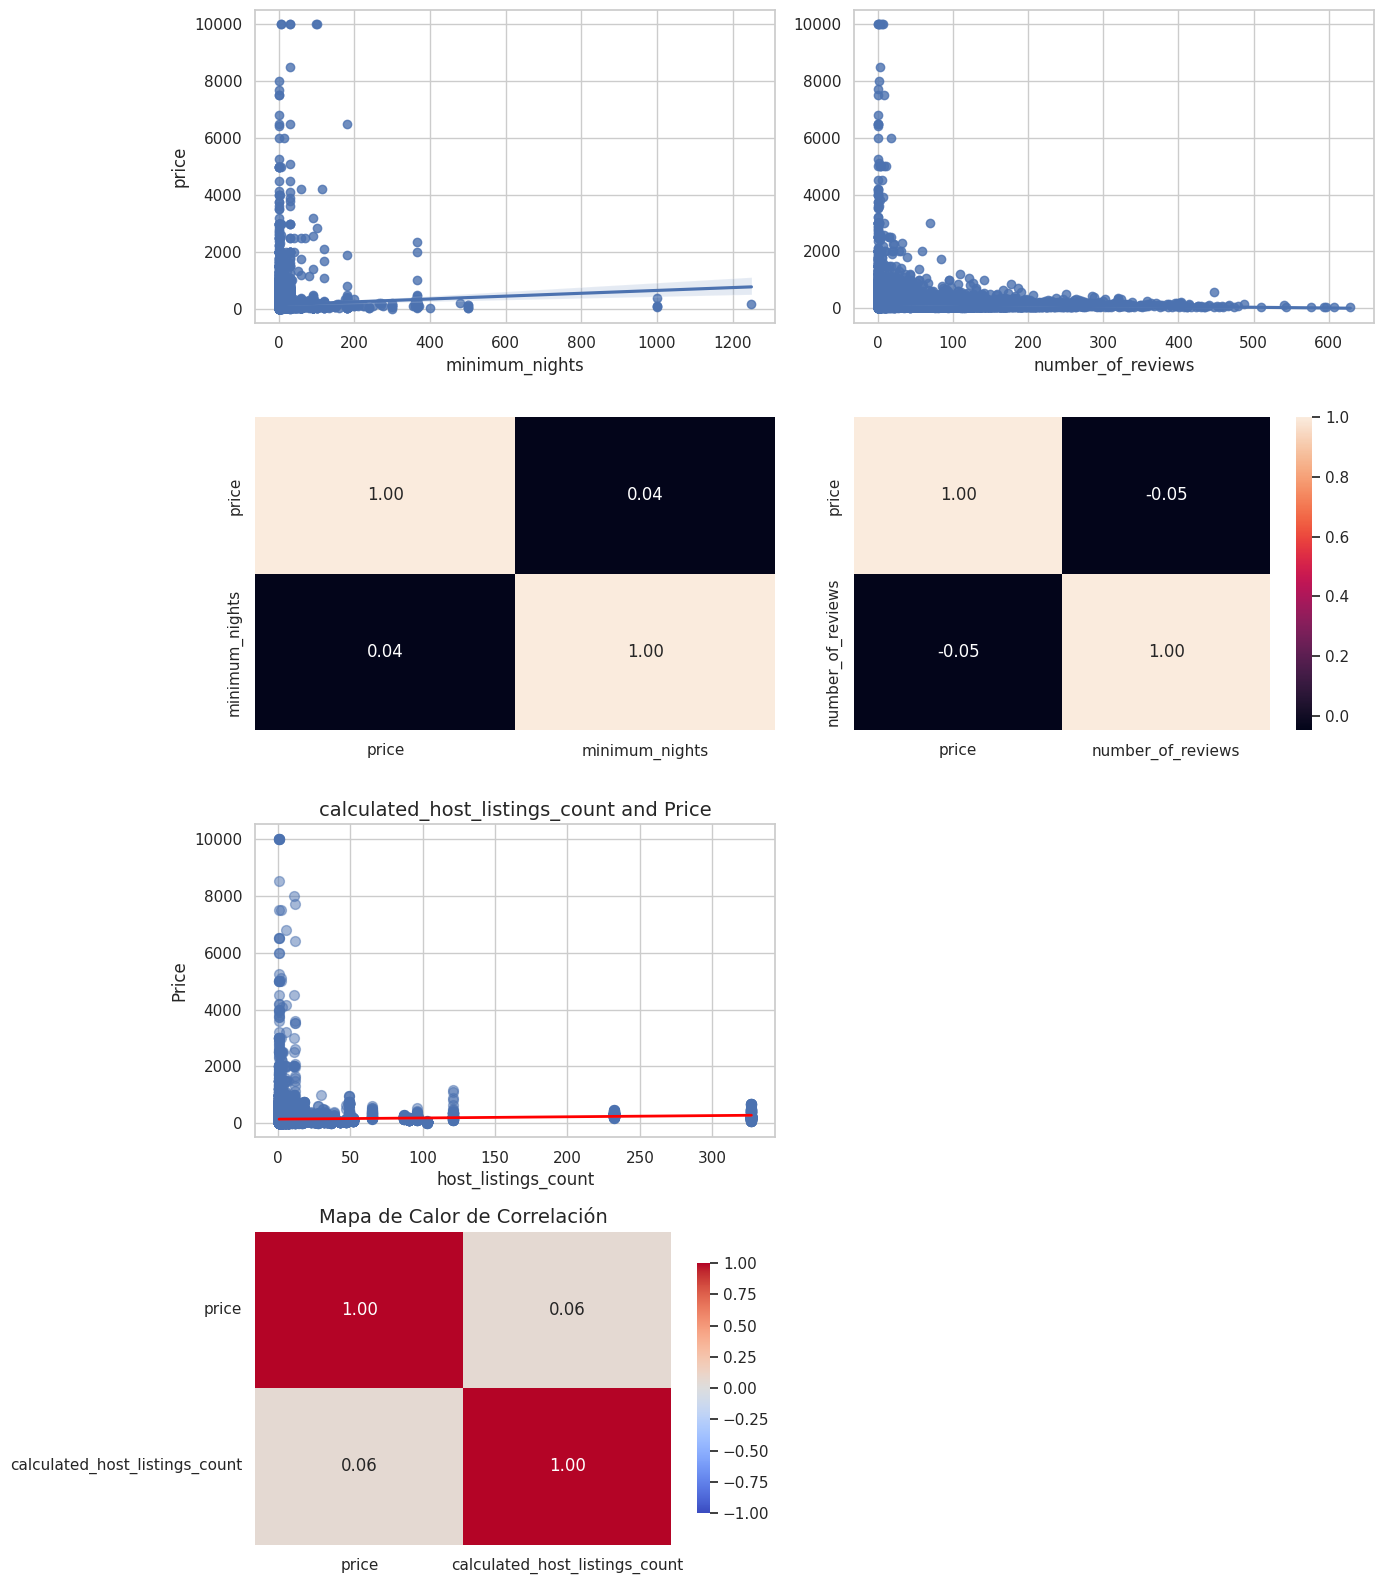

In [13]:
# Analisis numerico - numerico
fig, axis = plt.subplots(4, 2, figsize = (14, 16))

sns.regplot(ax = axis[0, 0], data = df_abny, x = "minimum_nights", y = "price")
sns.heatmap(df_abny[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_abny, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df_abny[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax=axis[2, 0], data=df_abny, x="calculated_host_listings_count", y="price", scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red', 'linewidth':2})
axis[2, 0].set_title('calculated_host_listings_count and Price', fontsize=14)
axis[2, 0].set_xlabel('host_listings_count', fontsize=12)
axis[2, 0].set_ylabel('Price', fontsize=12)
sns.heatmap(df_abny[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axis[3, 0], vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})
axis[3, 0].set_title('Mapa de Calor de Correlación', fontsize=14)

# Eliminar ejes vacíos
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

El analisis de las variables numericas arrojan:
* No existe relación entre el precio y el número mínimo de noches.
* No hay relación entre el número de reseñas y el precio.

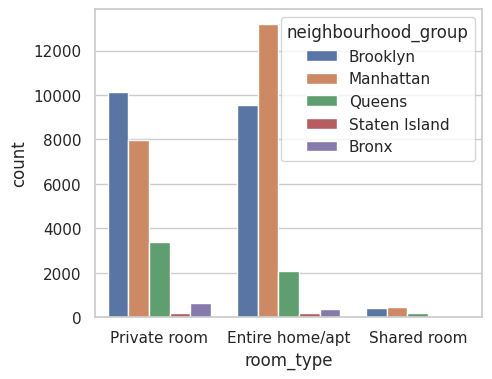

In [14]:
# Analisis categorico - categorico
fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df_abny, x = "room_type", hue = "neighbourhood_group")

plt.show()

El analisis de las variables categoricas arroja:
* Manhattan es el grupo que tiene más lugares completos para alquilar.
* Brooklyn es el segundo grupo más grande en alquilar, pero tiene más habitaciones privadas.
* Queens y Bronx son el tercero y cuarto y comparten con Brooklyn mayor numero de habitaciones privadas.
* Staten no representa mayores datos.


Tratamiento de datos y grafica para determinar los precios de los vecindarios

In [15]:

# Asegurarse de que 'neighbourhood_group' es una cadena (texto)
df_abny['neighbourhood_group'] = df_abny['neighbourhood_group'].astype(str)

# Calcular el precio promedio por grupo vecinal
mean_prices = df_abny.groupby('neighbourhood_group')['price'].mean().reset_index()

# Ordenar por precio promedio de mayor a menor
mean_prices = mean_prices.sort_values(by='price', ascending=False)
mean_prices

,neighbourhood_group,price
2,Manhattan,196.884903
1,Brooklyn,124.438915
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.577064


/tmp/ipykernel_684/3646981806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_prices, x='neighbourhood_group', y='price', palette='Set2')


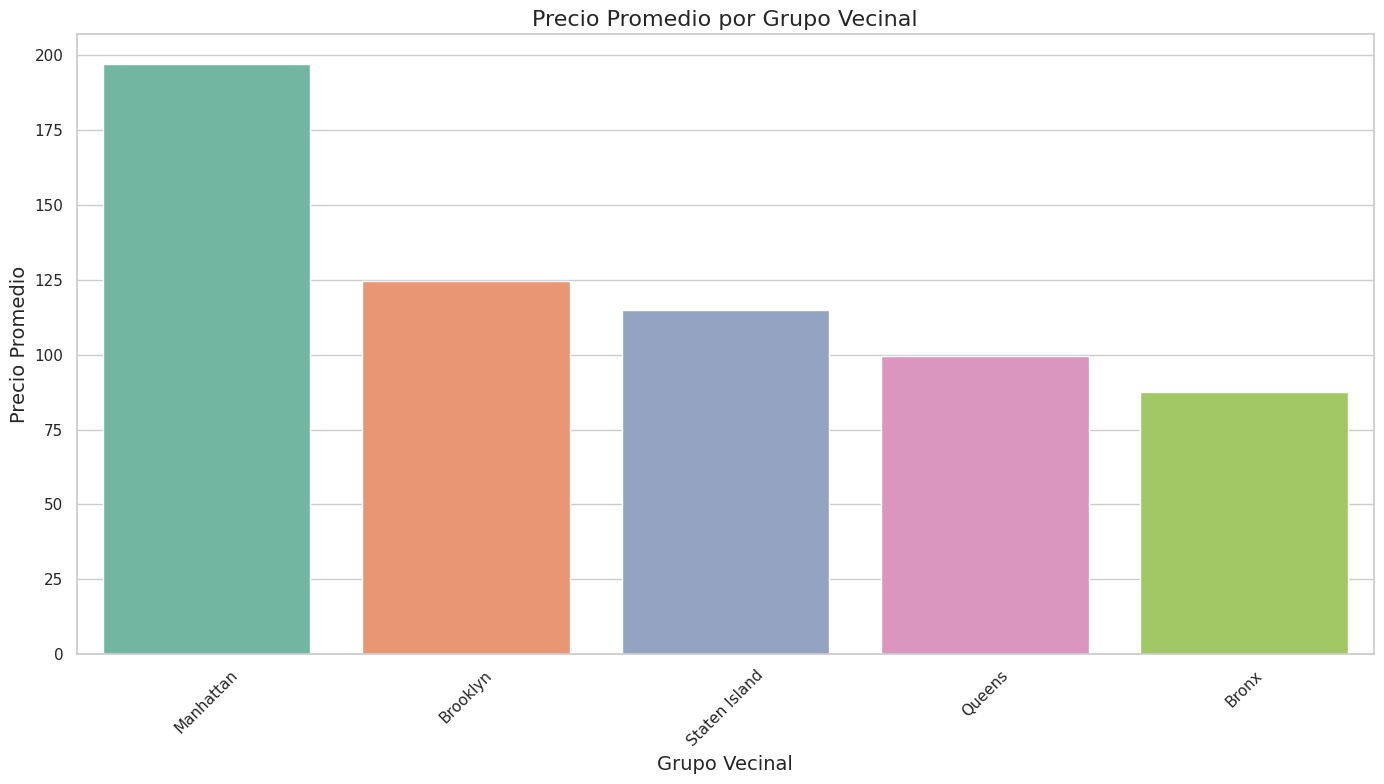

In [16]:
# Graficamos
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_prices, x='neighbourhood_group', y='price', palette='Set2')

# Añadir título y etiquetas
plt.title('Precio Promedio por Grupo Vecinal', fontsize=16)
plt.xlabel('Grupo Vecinal', fontsize=14)
plt.ylabel('Precio Promedio', fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Podemos concluir basado en el analisis que:
* Manhattan tiene el mayor precio con $ 196.884
* Segundo Brooklyn con $ 124.438
* Tercero Staten Island con $ 114.812

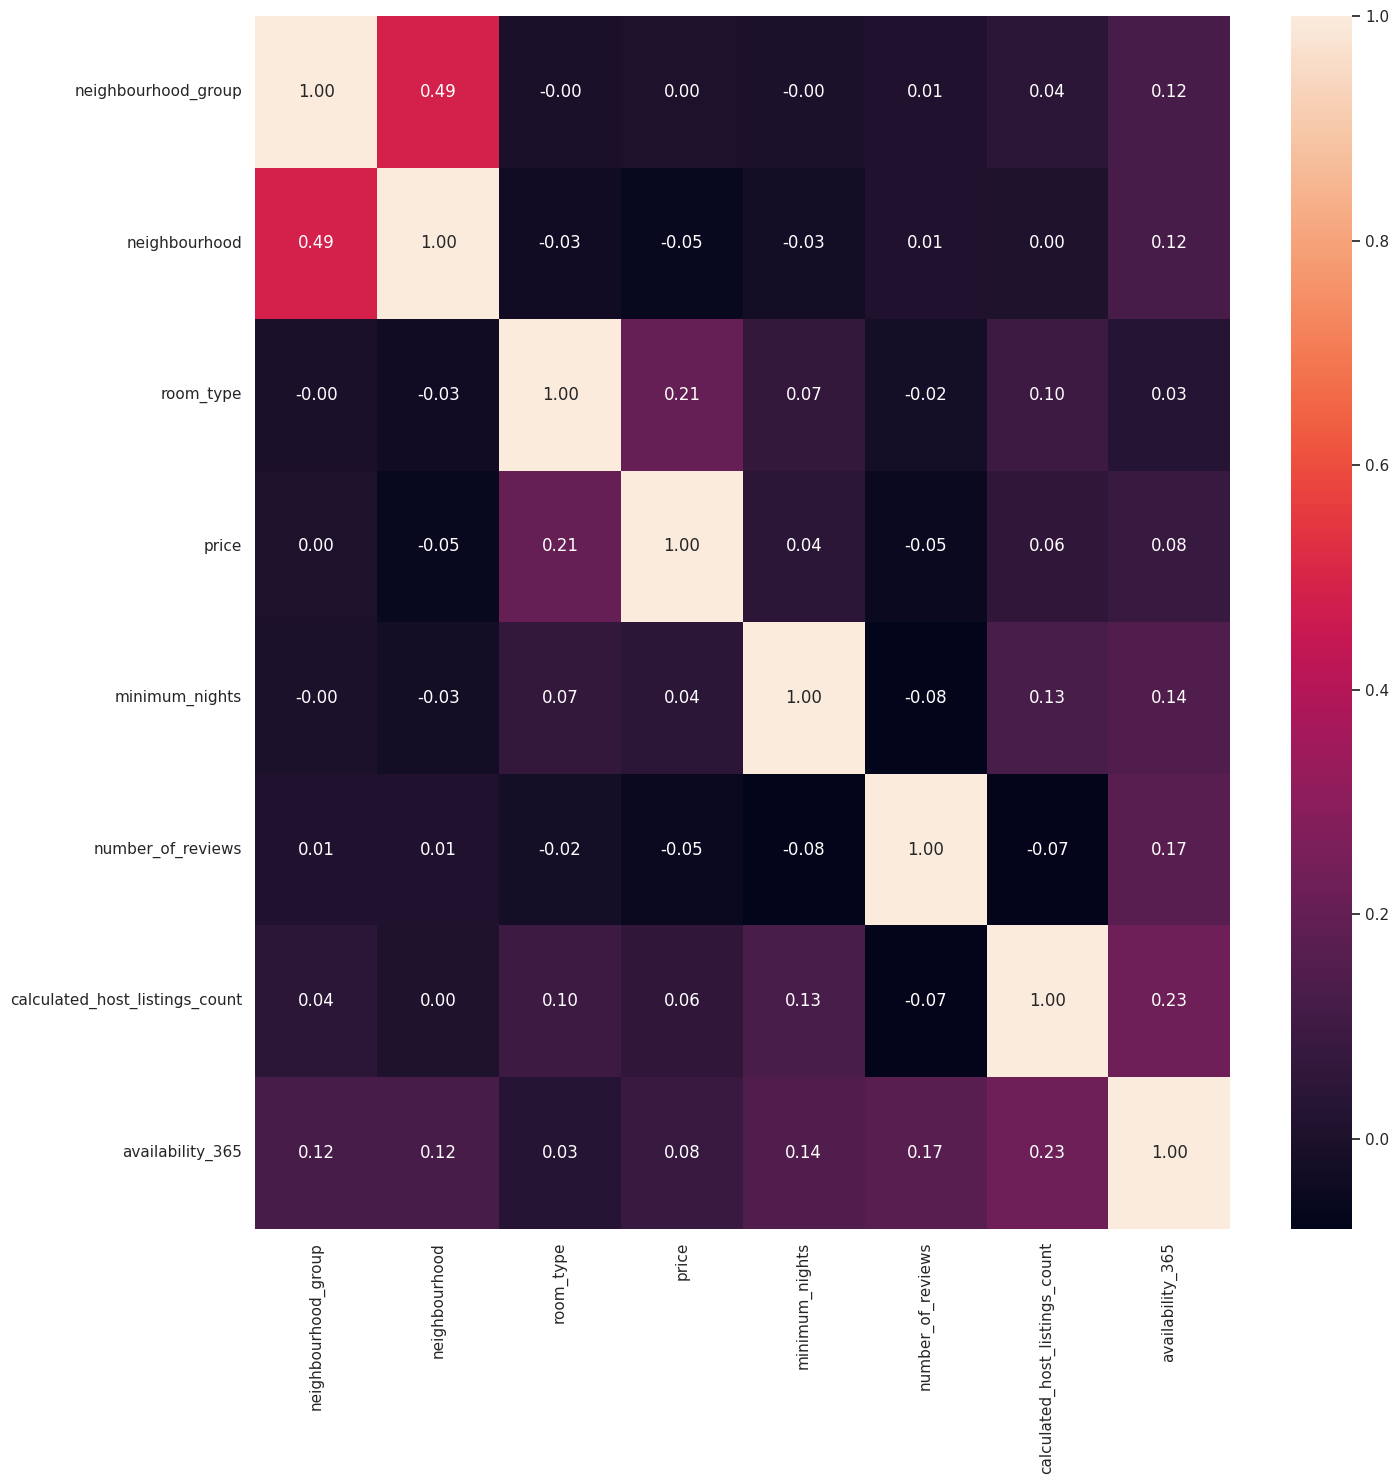

In [17]:
# Factorizar variables para matriz de correlacion
df_abny["room_type"] = pd.factorize(df_abny["room_type"])[0]
df_abny["neighbourhood_group"] = pd.factorize(df_abny["neighbourhood_group"])[0]
df_abny["neighbourhood"] = pd.factorize(df_abny["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df_abny[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Al analizar los datos notamos que hay una correlación muy baja entre todos los datos y en algunas ocaciones negativa.

# Paso 5
# Ingeniería de Características

In [18]:
df_abny.describe()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,0.786986,29.889534,40.728953,-73.952176,0.567118,152.755053,7.029887,23.271991,7.144628,112.779498
std,7.861666e+07,0.844288,34.673859,0.054532,0.046159,0.541183,240.170260,20.512224,44.551331,32.956185,131.627271
min,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,0.000000,8.000000,40.690100,-73.983080,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079257e+07,1.000000,19.000000,40.723080,-73.955685,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,40.763120,-73.936290,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


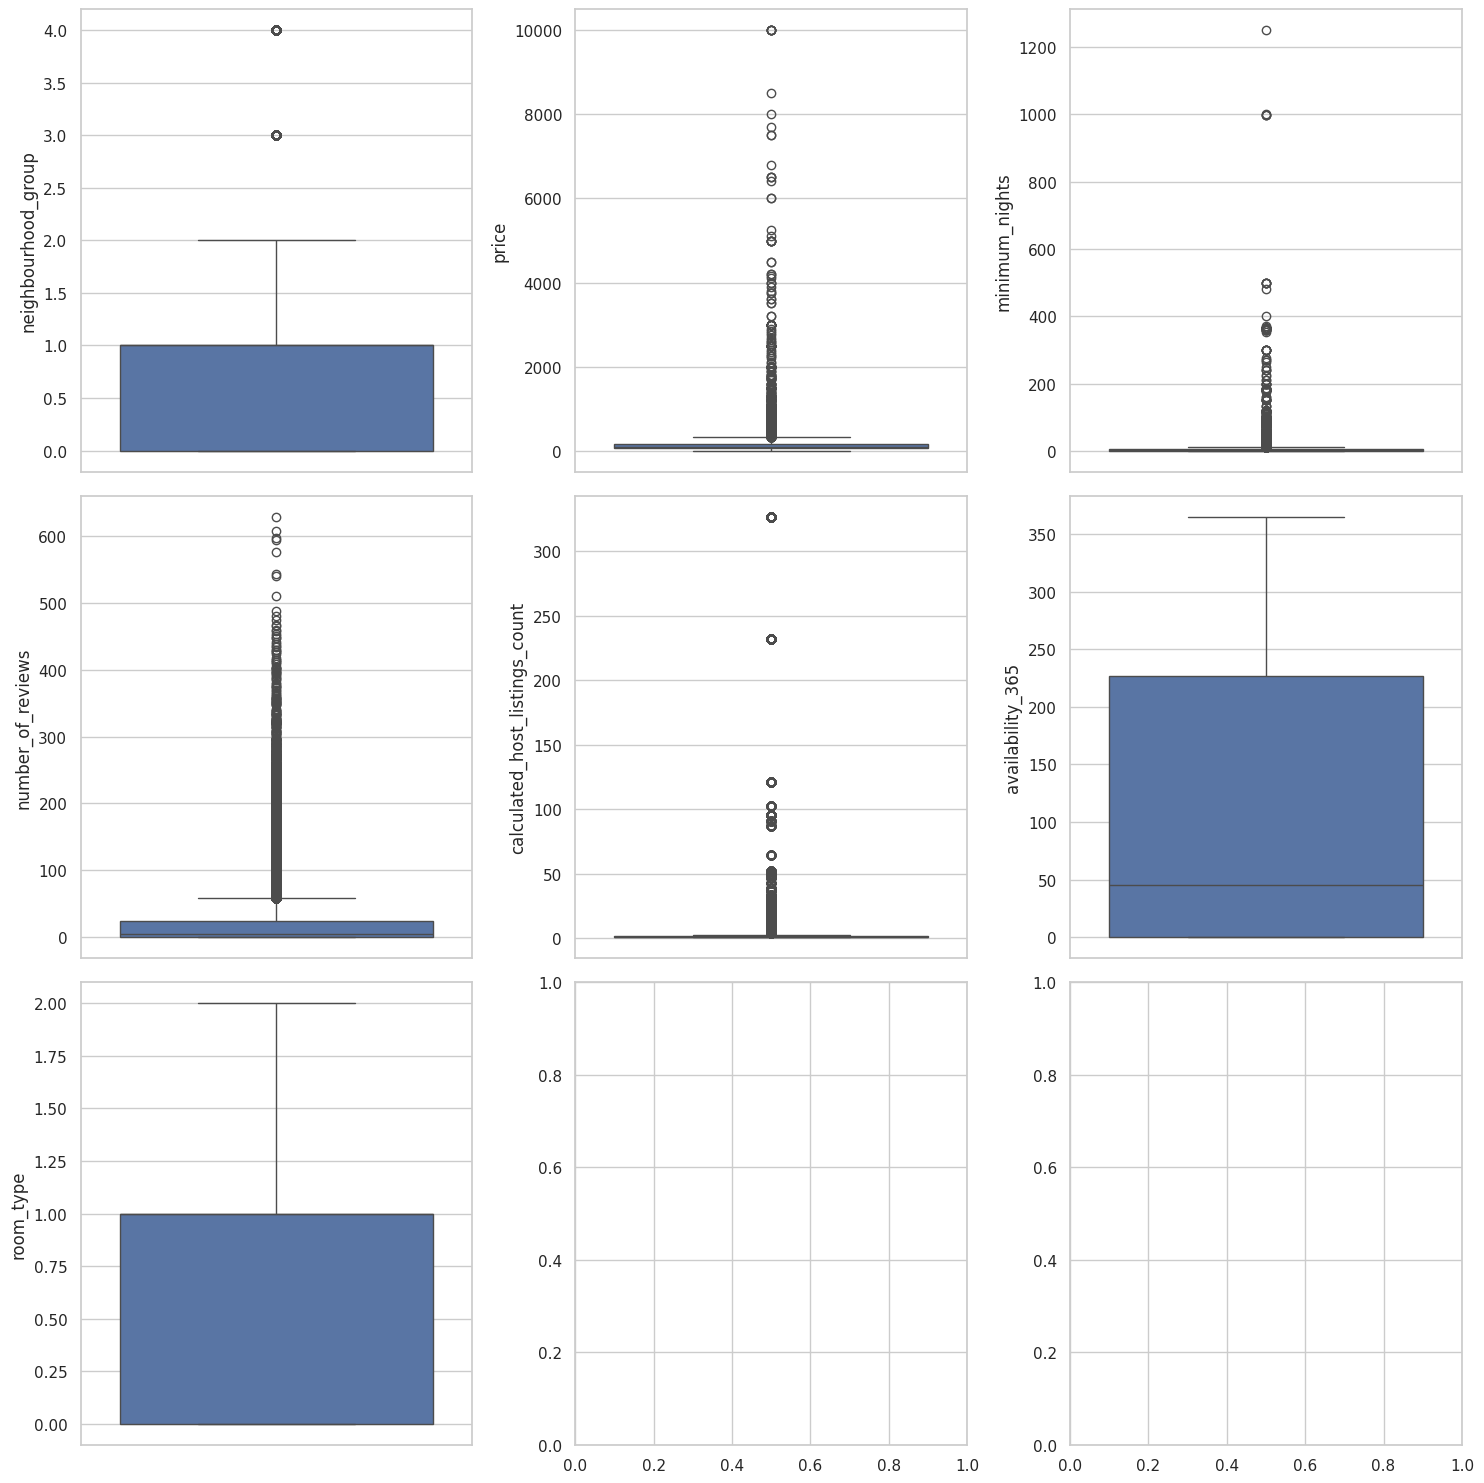

In [19]:
# Analisis de Outliers
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df_abny, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df_abny, y = "price")
sns.boxplot(ax = axes[0, 2], data = df_abny, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df_abny, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df_abny, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df_abny, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df_abny, y = "room_type")

plt.tight_layout()

plt.show()

In [20]:
price_stats = df_abny["price"].describe()
price_stats
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(price_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 334.0 y -90.0, con un rango intercuartil de 106.0


In [21]:
# Limpieza outlier price
df_abny = df_abny[df_abny["price"] > 0]
count_0 = df_abny[df_abny["price"] == 0].shape[0]
count_1 = df_abny[df_abny["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)


Count of 0:  0
Count of 1:  0


In [22]:
nights_stats = df_abny["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [23]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(nights_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 11.0 y -5.0, con un rango intercuartil de 4.0


In [24]:
# Limpieza outlier minimun nigths
df_abny = df_abny[df_abny["minimum_nights"] <= 15]
count_0 = df_abny[df_abny["minimum_nights"] == 0].shape[0]
count_1 = df_abny[df_abny["minimum_nights"] == 1].shape[0]
count_2 = df_abny[df_abny["minimum_nights"] == 2].shape[0]
count_3 = df_abny[df_abny["minimum_nights"] == 3].shape[0]
count_4 = df_abny[df_abny["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


In [25]:
hostlist_stats = df_abny["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [26]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(hostlist_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 3.5 y -0.5, con un rango intercuartil de 1.0


In [27]:
count_04 = sum(1 for x in df_abny["calculated_host_listings_count"] if x in range(0, 5))
count_1 = df_abny[df_abny["calculated_host_listings_count"] == 1].shape[0]
count_2 = df_abny[df_abny["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [28]:
# Valores nulos
df_abny.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Dividir conjunto de datos de train y test

In [30]:
from sklearn.model_selection import train_test_split

num_variables = ['host_id','neighbourhood_group','latitude','longitude','room_type','minimum_nights',
                 'calculated_host_listings_count','availability_365']

# Dividimos el conjunto de datos en muestras de train y test
X = df_abny.drop("price", axis = 1)[num_variables]
y = df_abny["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
42032,64433748,1,40.74855,-74.00074,2,1,1,208
32759,190921808,1,40.75393,-73.99558,0,7,47,354
27831,158920456,0,40.67860,-73.92550,0,1,1,184
43410,253504649,1,40.78134,-73.95212,1,5,1,146
37689,224696045,0,40.59362,-73.95659,1,2,1,276


Normalizacion

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
42032,-0.035559,0.249321,0.371212,-1.056079,2.664318,-0.786468,-0.109281,0.855560
32759,1.576777,0.249321,0.468305,-0.947007,-1.007560,1.613676,2.049401,2.015884
27831,1.168858,-0.904201,-0.891176,0.534353,-1.007560,-0.786468,-0.109281,0.664822
43410,2.374517,0.249321,0.962974,-0.028344,0.828379,0.813628,-0.109281,0.362819
37689,2.007295,-0.904201,-2.424811,-0.122831,0.828379,-0.386444,-0.109281,1.395985


Escalado Mínimo-Máximo

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
42032,0.234877,0.25,0.601931,0.461935,1.0,0.000000,0.000000,0.569863
32759,0.695976,0.25,0.614949,0.471717,0.0,0.428571,0.141104,0.969863
27831,0.579318,0.00,0.432671,0.604565,0.0,0.000000,0.000000,0.504110
43410,0.924115,0.25,0.681274,0.554102,0.5,0.285714,0.000000,0.400000
37689,0.819096,0.00,0.227043,0.545629,0.5,0.071429,0.000000,0.756164


# Paso 6 
# Seleccion de Caracteristicas

In [33]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con valor de k = 6 
selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,host_id,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,64433748.0,-74.00074,2.0,1.0,1.0,208.0
1,190921808.0,-73.99558,0.0,7.0,47.0,354.0
2,158920456.0,-73.92550,0.0,1.0,1.0,184.0
3,253504649.0,-73.95212,1.0,5.0,1.0,146.0
4,224696045.0,-73.95659,1.0,2.0,1.0,276.0


Guardado de datos limpios

In [34]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)